In [10]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import cv2
from sklearn.metrics import accuracy_score, f1_score

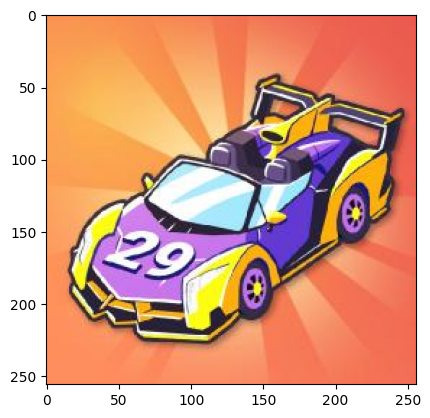

In [11]:
img = cv2.cvtColor(cv2.imread("../data/Car.jpeg"), cv2.COLOR_BGR2RGB)
#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.imshow(img)
plt.show()

In [12]:
def objective_function(vec,out, img):
    # blank mask for drawing the shapes
    shapes = np.zeros_like(img, np.uint8)
    t = out.copy()
    # draw circle
    vec[2] = np.abs(vec[2])
    cv2.circle(shapes, (int(vec[0]), int(vec[1])), int(vec[2]), (vec[3], vec[4], vec[5]), cv2.FILLED)
    mask = shapes.astype(bool)
    t[mask] = cv2.addWeighted(t, 1-vec[6], shapes, vec[6], 0)[mask]

    # plt.imshow(t)
    # plt.show()

    #bt = t[: ,: ,0]
    #gt = t[: ,: ,1]
    #rt = t[: ,: ,2]
    #bImg = img[:,:,0]
    #gImg = img[:,:,1]
    #rImg= img[:,:,2]
    # print("(",vec[3],vec[4],vec[5],")")
    return np.sum(np.abs(np.subtract(img,t))) 

    #b  = f1_score(bImg, bt, average='micro')
    #g =  f1_score(gImg, gt, average='micro')
    #r =  f1_score(rImg, rt, average='micro')
    #return np.average((r, g, b)) 
    
out = np.zeros_like(img)
objective_function([100,90, 8, 0,0,255,0.3], out, img) #X,Y,r,R,G,B,alpha

29736021

In [13]:
def draw_circle(vec, out, print = False):
    shapes = np.zeros_like(out, np.uint8)

    cv2.circle(shapes, (int(vec[0]), int(vec[1])), int(vec[2]), (vec[3], vec[4], vec[5]), cv2.FILLED)
    mask = shapes.astype(bool)
    out[mask] = cv2.addWeighted(out, 1-vec[6], shapes, vec[6], 0)[mask]

    if print:
        plt.imshow(out)
        plt.show()

In [14]:
w,h,c = img.shape

bounds = [
    [0,w],# x
    [0,h], # y
    [5, (w + h)//4], # radius
    [0,255], # R
    [0,255], # G
    [0,255], # B
    [0.6,1], # alpha
]

nIter = 100

# Our Differential Evolution

In [15]:
from differential_evolution import differential_evolution

0 {'P': array([-249.97316408,  666.6944353 ,  833.39277768,  244.88259736,
         98.02423637,   78.3772489 ,    0.95341348]), 'nIt': 800, 'fun': 14281706, 'nFev': 12015}


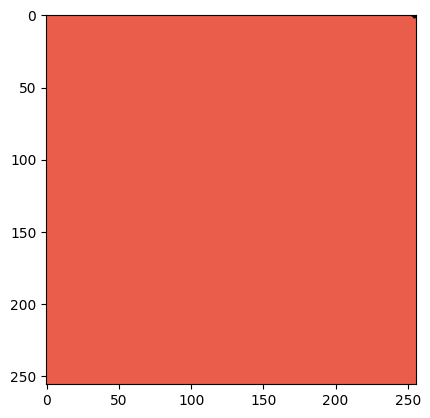

20 {'P': array([-7.97092243e+02,  2.78682311e+02,  8.94789320e+02,  2.54311951e+02,
        1.53490693e+02, -1.55228642e+03, -4.15088678e-02]), 'nIt': 800, 'fun': 9266952, 'nFev': 12015}


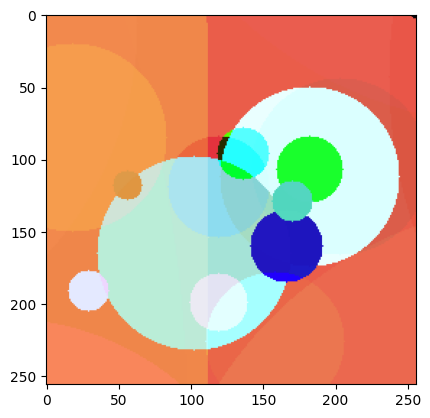

40 {'P': array([ 9.01032132e+01, -5.37190871e+00,  4.90582477e+01,  1.98307381e+03,
       -8.24214639e+01, -2.30154129e+02,  2.58029926e-01]), 'nIt': 800, 'fun': 8793789, 'nFev': 12015}


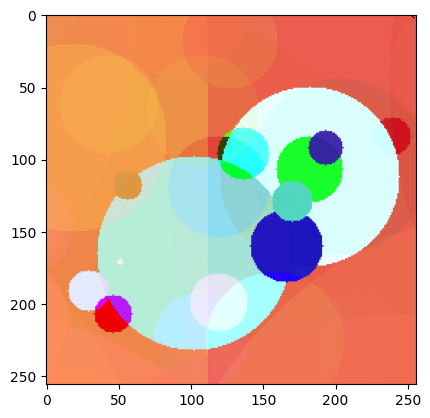

60 {'P': array([ 1.66457225e+01,  6.02419961e+01,  2.63627552e+01,  2.03844611e+02,
        1.98120043e+01,  9.45385818e+01, -2.71027045e-02]), 'nIt': 800, 'fun': 8345639, 'nFev': 12015}


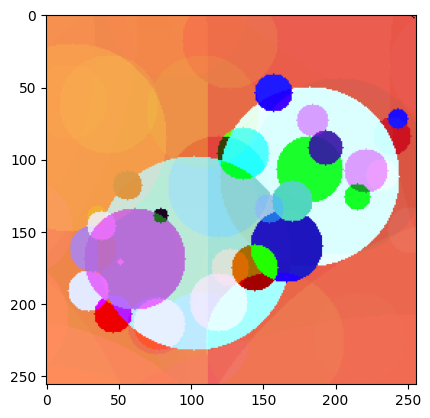

80 {'P': array([ 4.64302508e+01,  1.06178663e+02,  1.95975942e+01,  2.47662746e+02,
       -1.14520499e+03, -5.00032343e+03,  7.80153466e-01]), 'nIt': 800, 'fun': 7964958, 'nFev': 12015}


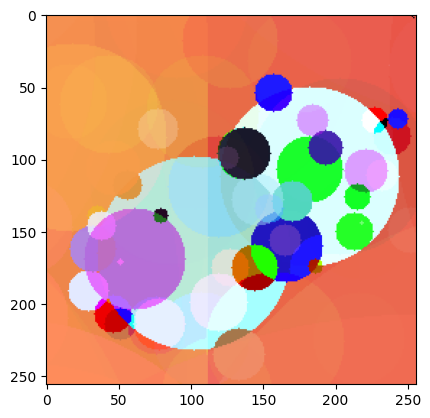

KeyboardInterrupt: 

In [16]:
out = np.zeros_like(img)
for i in range(nIter):
    r = differential_evolution(objective_function, bounds, args = (out, img), popSize=15, cR = 0.3, nGen = 800) #The smaller cR is, it takes less risks
    if i % (nIter // np.min((nIter, 5))): 
        draw_circle(r["P"], out)
    else:
        print(i, r)
        draw_circle(r["P"], out, True)
plt.imshow(out)

# Scipy Differential Evolution

In [ ]:
from scipy.optimize import differential_evolution

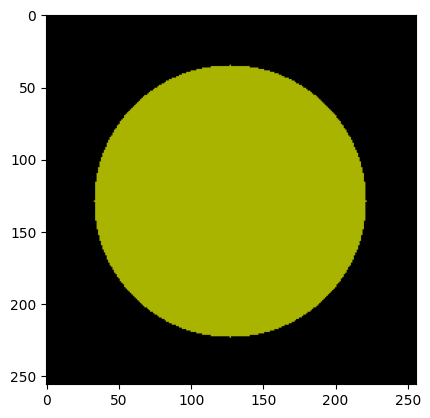

0      fun: 8176381.0
 message: 'Optimization terminated successfully.'
    nfev: 53208
     nit: 75
 success: True
       x: array([127.15131779, 129.21584593,  94.38511921, 186.44751801,
       197.68930244,   0.47496861,   0.90979394])


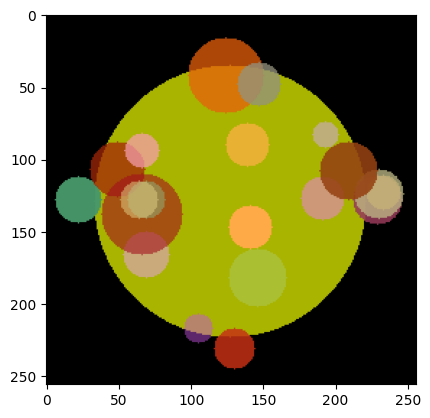

20      fun: 6767889.0
 message: 'Optimization terminated successfully.'
    nfev: 6308
     nit: 8
 success: True
       x: array([209.45497682, 108.00038458,  20.08564545, 148.82538091,
        64.65982453,  16.61836749,   0.87614331])


KeyboardInterrupt: 

In [ ]:
out = np.zeros_like(img)
for i in range(nIter):
    res = differential_evolution(objective_function, bounds, args=(out,img), popsize= 100)
    # plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
    # plt.show()
    if i % (nIter // np.min((nIter, 5))): draw_circle(res.x, out)
    else:
        draw_circle(res.x, out, True)
        print(i, res)
plt.imshow(out)

# Project

## Recommendation

Work along *scipy*. The idea is to make the project behave as scipy does.

Start with something small and easy. With few details and an image of 200 x 200 approx.

## Individual

The individual is recommended to have:

- **x** - x coordinate value of the circle.

- **y** - y coordinate value of the circle.

- **r** - Radius of the circle, recommended value is (3 or something like that to half the image size).

- **Colors** - RGBA

    - Alpha is optional.

## How it works

This algorithm has to execute itself as many times as circles the image has.

Each execution will add a new circle that minimizes the difference between the image we're building and the target one.